In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
def randomize_doors():
    doors = {}
    random_door = np.random.randint(0,3)
    doors[random_door] = True
    for i in range(0,3):
        if i not in doors:
            doors[i] = False
    return doors, random_door

def removing_wrong_door(doors, chosen_door):
    not_chosen = []
    for door in doors:
        if door != chosen_door:
            not_chosen.append(door)
    if doors[chosen_door] == True:
        random_not_chosen = np.random.randint(0,2)
        del doors[not_chosen[random_not_chosen]]
    else:
        for door in doors:
            if (door != chosen_door) & (doors[door] == False):
                del doors[door]
                break
    return doors

def choose_door(change=False):
    doors, winning_door = randomize_doors()
    chosen_door = np.random.randint(0,3)
    doors = removing_wrong_door(doors, chosen_door)
    if change:
        for i in list(doors):
            if chosen_door != i:
                chosen_door = i
                break
    if doors[chosen_door]:
        return [chosen_door, winning_door, 1]
    return [chosen_door, winning_door, 0]

In [5]:
not_changing = [choose_door(change=False) for i in range(0,500000)]
changing = [choose_door(change=True) for i in range(0,500000)]

In [6]:
not_changing = pd.DataFrame(not_changing, columns=["chosen_door", "winning_door", "won"])
changing = pd.DataFrame(changing, columns=["chosen_door", "winning_door", "won"])

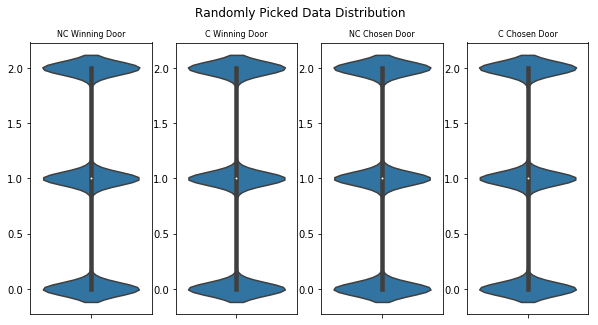

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(10,5))

fig.suptitle("Randomly Picked Data Distribution",)

sns.violinplot(y=[not_changing["winning_door"]], ax=axs[0])
axs[0].set_title("NC Winning Door", fontsize=8)

sns.violinplot(y=[changing["winning_door"]], ax=axs[1])
axs[1].set_title("C Winning Door", fontsize=8)

sns.violinplot(y=[not_changing["chosen_door"]], ax=axs[2])
axs[2].set_title("NC Chosen Door", fontsize=8)

sns.violinplot(y=[changing["chosen_door"]], ax=axs[3])
axs[3].set_title("C Chosen Door", fontsize=8)

plt.show()

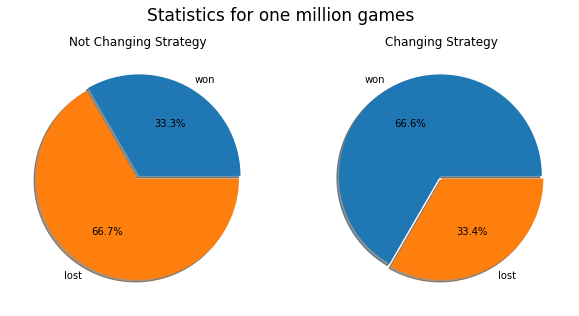

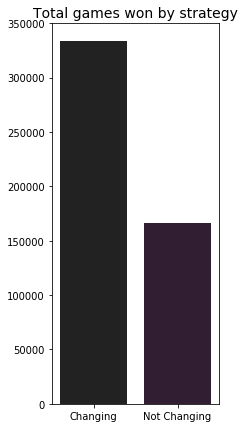

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle("Statistics for one million games", fontsize=17)

axs[0].pie([not_changing["won"].value_counts()[1], not_changing["won"].value_counts()[0]],
           autopct="%.1f%%",
           labels=["won", "lost"],
           shadow=True,
           explode=[0.03,0]
          )
axs[0].set_title("Not Changing Strategy")

axs[1].set_title("Changing Strategy")
axs[1].pie([changing["won"].value_counts()[1], changing["won"].value_counts()[0]],
           autopct="%.1f%%",
           labels=["won", "lost"],
           shadow=True,
           explode=[0.03,0]
          )

plt.show()

#########################
plt.figure(figsize=(3,7))
plt.title("Total games won by strategy", fontsize=14)
sns.barplot(x=["Changing", "Not Changing"], y=[changing["won"].value_counts()[1], not_changing["won"].value_counts()[1]], palette=sns.dark_palette("purple"))
plt.show()